In [1]:
from mnist import MNIST
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import scipy

In [2]:
mndata = MNIST('../data')
TrainingData = mndata.load_training()
TestData     = mndata.load_testing()

In [3]:
X_train = np.array(TrainingData[0])
Y_train = np.array(TrainingData[1])
X_test  = np.array(TestData[0])
Y_test  = np.array(TestData[1])

the number shoud be 5


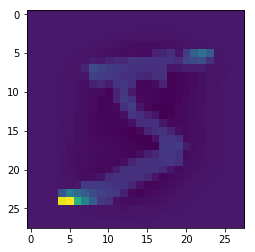

In [23]:
def Visualize(a):
    data = a.reshape((28, 28))
    imshow(data)
Visualize(X_std[0])
print "the number shoud be", Y_train[0]

In [5]:
X_std = StandardScaler().fit_transform(X_train)

C:\Users\wexleyz\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
u,s,v = scipy.sparse.linalg.svds(X_std.T)

In [7]:
print u.shape, s.shape, v.shape

(784L, 6L) (6L,) (6L, 60000L)
